In [3]:
!pip install scipy

     --------------------------------------- 42.5/42.5 MB 22.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom
import math


In [2]:
T = 2000
mu_1 = 0.5 - 1/4
mu_2 = 0.5 - 1/8
mu_3 = 0.5 - 1/16


X = bernoulli(mu_1)
sequence1 = X.rvs(2000)
X = bernoulli(mu_2)
sequence2 = X.rvs(2000)
X = bernoulli(mu_3)
sequence3 = X.rvs(2000)
sequences = np.array([sequence1, sequence2, sequence3])

K = 2


In [93]:
def FTL(sequence):
    L_prev = [0, 0]
    loss = np.array([])
    p_arm = np.array([])
    
    for t in range(len(sequence)):
        guess = L_prev.index(max(L_prev))
        p_arm = np.append(p_arm, guess)
        if guess == sequence[t]:
            loss = np.append(loss, 0)
        else:
            loss = np.append(loss, 1)
        L_prev[sequence[t]] += 1
    return loss



def hedge_alg(eta0, sequence, anytime = False):
    L_prev = [0, 0]
    loss = np.array([])
    p_arm = np.array([])

    for t in range(len(sequence)):
        if anytime: eta = eta0[t]
        else: eta = eta0

        #p_t = float x 2
        p_t0 = math.exp(-eta * L_prev[0]) / (math.exp(-eta * L_prev[0]) + math.exp(-eta * L_prev[1]))
        p_t = [p_t0, 1 - p_t0]
                                                            
        #Sample A_t according to p_t and play it
        A_t = np.random.binomial(1, p_t[0])
        p_arm = np.append(p_arm, A_t)
        if A_t == sequence[t]:
            loss = np.append(loss, 0)
        else: 
            loss = np.append(loss, 1)

        #update L_t
        L_prev[sequence[t]] += 1
    return loss


In [5]:
eta_h = math.sqrt((2 * math.log(K))/T)
eta_rp = math.sqrt((8 * math.log(K))/T)
eta_anytime_h = [math.sqrt((math.log(K))/t) for t in range(1, T+1)]
eta_anytime_rp = [2 * math.sqrt((math.log(K))/t) for t in range(1, T+1)]

for i in range(10):
    for sequence in [sequence1]:
        out_FTL, arm_FTL = FTL(sequence)
        out_h, arm_h = hedge_alg(eta_h, sequence)
        out_rp, arm_rp = hedge_alg(eta_rp, sequence)
        out_anytime_h, arm_anytime_h = hedge_alg(eta_anytime_h, sequence, anytime = True)
        out_anytime_rp, arm_anytime_rp = hedge_alg(eta_anytime_rp, sequence, anytime = True)



print(np.cumsum(out_FTL))
print(np.cumsum(out_h))
print(np.cumsum(out_rp))
print(np.cumsum(out_anytime_h))
print(np.cumsum(out_anytime_rp))
print("\n")
delta1 = 1/2
print(np.cumsum([(delta1) if arm == 1 else 0 for arm in arm_FTL]))
print(np.cumsum([(delta1) if arm == 1 else 0 for arm in arm_h]))
print(np.cumsum([(delta1) if arm == 1 else 0 for arm in arm_rp]))
print(np.cumsum([(delta1) if arm == 1 else 0 for arm in arm_anytime_h]))
print(np.cumsum([(delta1) if arm == 1 else 0 for arm in arm_anytime_rp]))


ValueError: too many values to unpack (expected 2)

In [92]:
eta_h = math.sqrt((2 * math.log(K))/T)
eta_rp = math.sqrt((8 * math.log(K))/T)
eta_anytime_h = [math.sqrt((math.log(K))/t) for t in range(1, T+1)]
eta_anytime_rp = [2 * math.sqrt((math.log(K))/t) for t in range(1, T+1)]

def get_regrets(delta, arm_model):
    return np.cumsum([delta if arm == 1 else 0 for arm in arm_model])


delta1 = 1/4

X = bernoulli(mu_1)
sequences1 = adv_arr

sd_ftl = np.std([get_regrets(delta1, FTL(sequence)) for sequence in sequences1], axis = 0)
mean_ftl = np.mean([get_regrets(delta1, FTL(sequence)) for sequence in sequences1], axis = 0)

sd_h = np.std([get_regrets(delta1, hedge_alg(eta_h, list(sequence))) for sequence in sequences1], axis = 0)
mean_h = np.mean([get_regrets(delta1, hedge_alg(eta_h, list(sequence))) for sequence in sequences1], axis = 0)

sd_rp = np.std([get_regrets(delta1, hedge_alg(eta_rp, list(sequence))) for sequence in sequences1], axis = 0)
mean_rp = np.mean([get_regrets(delta1, hedge_alg(eta_rp, list(sequence))) for sequence in sequences1], axis = 0)

sd_any_h = np.std([get_regrets(delta1, hedge_alg(eta_anytime_h, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)
mean_any_h = np.mean([get_regrets(delta1, hedge_alg(eta_anytime_h, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)

sd_any_rp = np.std([get_regrets(delta1, hedge_alg(eta_anytime_rp, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)
mean_any_rp = np.mean([get_regrets(delta1, hedge_alg(eta_anytime_rp, list(sequence), anytime = True)) for sequence in sequences1], axis = 0) 
sd_arr = [sd_ftl, sd_h, sd_rp, sd_any_h, sd_any_rp]
mean_arr = [mean_ftl, mean_h, mean_rp, mean_any_h, mean_any_rp]

TypeError: object of type 'numpy.int32' has no len()

In [113]:
eta_h = math.sqrt((2 * math.log(K))/T)
eta_rp = math.sqrt((8 * math.log(K))/T)
eta_anytime_h = [math.sqrt((math.log(K))/t) for t in range(1, T+1)]
eta_anytime_rp = [2 * math.sqrt((math.log(K))/t) for t in range(1, T+1)]

adv_arr = [(([1] * (i + 1) + [0] * (i + 1)) * 2000)[:2000] for i in range(10)]

sequences1 = adv_arr

sd_ftl = np.std([np.cumsum(FTL(sequence)) for sequence in sequences1], axis = 0)
mean_ftl = np.mean([np.cumsum(FTL(sequence)) for sequence in sequences1], axis = 0)

sd_h = np.std([np.cumsum(hedge_alg(eta_h, list(sequence))) for sequence in sequences1], axis = 0)
mean_h = np.mean([np.cumsum(hedge_alg(eta_h, list(sequence))) for sequence in sequences1], axis = 0)

sd_rp = np.std([np.cumsum(hedge_alg(eta_rp, list(sequence))) for sequence in sequences1], axis = 0)
mean_rp = np.mean([np.cumsum(hedge_alg(eta_rp, list(sequence))) for sequence in sequences1], axis = 0)

sd_any_h = np.std([np.cumsum(hedge_alg(eta_anytime_h, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)
mean_any_h = np.mean([np.cumsum(hedge_alg(eta_anytime_h, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)

sd_any_rp = np.std([np.cumsum(hedge_alg(eta_anytime_rp, list(sequence), anytime = True)) for sequence in sequences1], axis = 0)
mean_any_rp = np.mean([np.cumsum(hedge_alg(eta_anytime_rp, list(sequence), anytime = True)) for sequence in sequences1], axis = 0) 
sd_arr = [sd_ftl, sd_h, sd_rp, sd_any_h, sd_any_rp]
mean_arr = [mean_ftl, mean_h, mean_rp, mean_any_h, mean_any_rp]

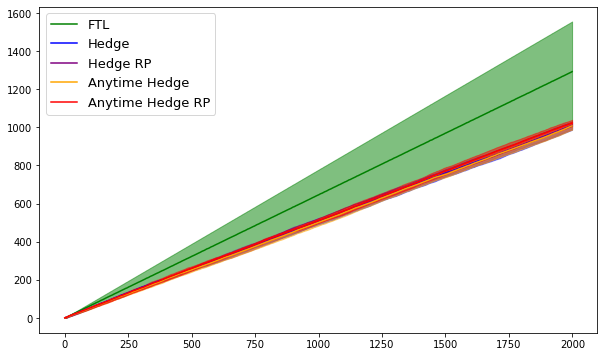

In [115]:
color = ['green', 'blue', 'purple', 'orange', 'red']
data_label = ["FTL","Hedge","Hedge RP","Anytime Hedge","Anytime Hedge RP"]
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(mean_arr[i], color = color[i], label = data_label[i])
    plt.fill_between(range(2000), (mean_arr[i] - sd_arr[i]), (mean_arr[i] + sd_arr[i]), color = color[i], alpha = 0.5)
plt.legend(fontsize = 13)
plt.show()


In [127]:
regret_data = {
    'FTL': mean_ftl,
    'h': mean_h,
    'rp': mean_rp,
    'any_h': mean_any_h,
    'any_rp': mean_any_rp,
}

#pd.DataFrame(df_data).to_csv('distances.csv', index = False)

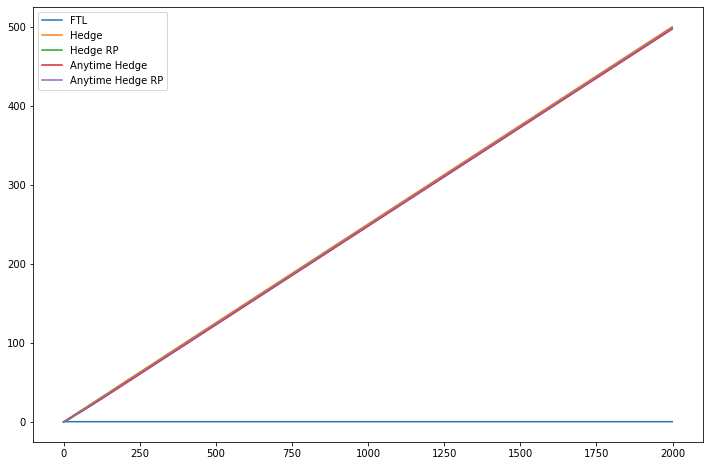

In [128]:
plt.figure(figsize=(12, 8))


plt.plot(regret_data['FTL'], label='FTL')
plt.plot(regret_data['h'], label='Hedge')
plt.plot(regret_data['rp'], label='Hedge RP')
plt.plot(regret_data['any_h'], label='Anytime Hedge')
plt.plot(regret_data['any_rp'], label='Anytime Hedge RP')



plt.legend()
plt.show()